<a href="https://colab.research.google.com/github/HALAXAR/Basic-machine-learning-projects-/blob/main/Simple_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing necessary libraries

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
from pathlib import Path

## Setting up device

In [2]:
device = 'cuda' if torch.cuda.is_available else 'cpu'
device

'cuda'

## Creating straight line dataset

Using linear regression formula `weight*X + bias` we are creating a dataset

In [3]:
weight = 0.3
bias = 0.9

start = 0
stop = 1
step = 0.02
X = torch.arange(start,stop,step).unsqueeze(dim=1)
y = weight * X + bias
X[:10] , y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.9000],
         [0.9060],
         [0.9120],
         [0.9180],
         [0.9240],
         [0.9300],
         [0.9360],
         [0.9420],
         [0.9480],
         [0.9540]]))

## Splitting the dataset

Here we are splitting the dataset for training and testing purposes following
the 80:20 rule

In [4]:
train_test_split = int(0.8*len(X))
X_train, y_train = X[:train_test_split],y[:train_test_split]
X_test, y_test = X[train_test_split:],y[train_test_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

## Creating a visualizing function

In [5]:
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data,train_labels,c='b',s=4,label="Training data")

  plt.scatter(test_data,test_labels,c='g',s=4,label="Testing data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c='r',s=4,label="Predictions")

  plt.legend(prop={'size':14})


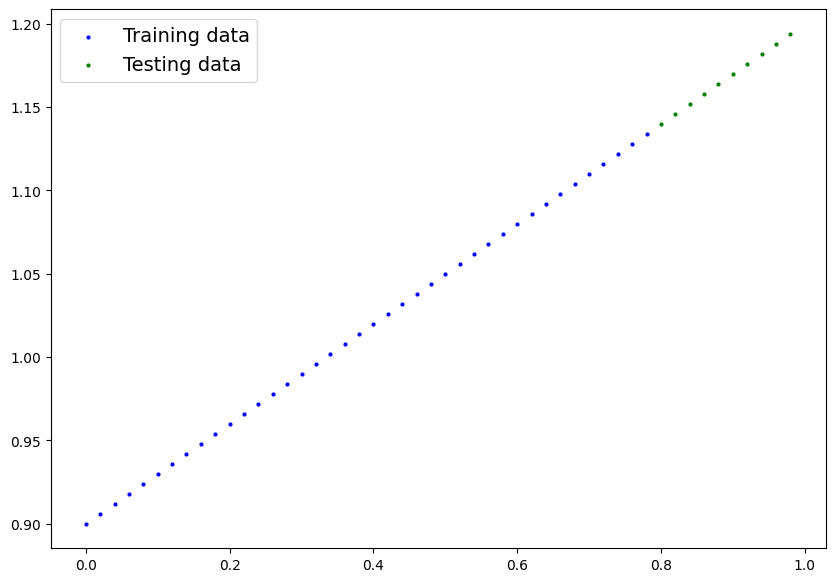

In [6]:
plot_prediction()

## Creating Model

In [7]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
      super().__init__()
      self.Linear_layer = nn.Linear(in_features=1,out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.Linear_layer(x)

In [8]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
model_0.state_dict()

OrderedDict([('Linear_layer.weight', tensor([[0.7645]])),
             ('Linear_layer.bias', tensor([0.8300]))])

## Generating Random preditions

In [9]:
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[1.4416],
        [1.4569],
        [1.4722],
        [1.4875],
        [1.5028],
        [1.5181],
        [1.5334],
        [1.5487],
        [1.5640],
        [1.5793]])

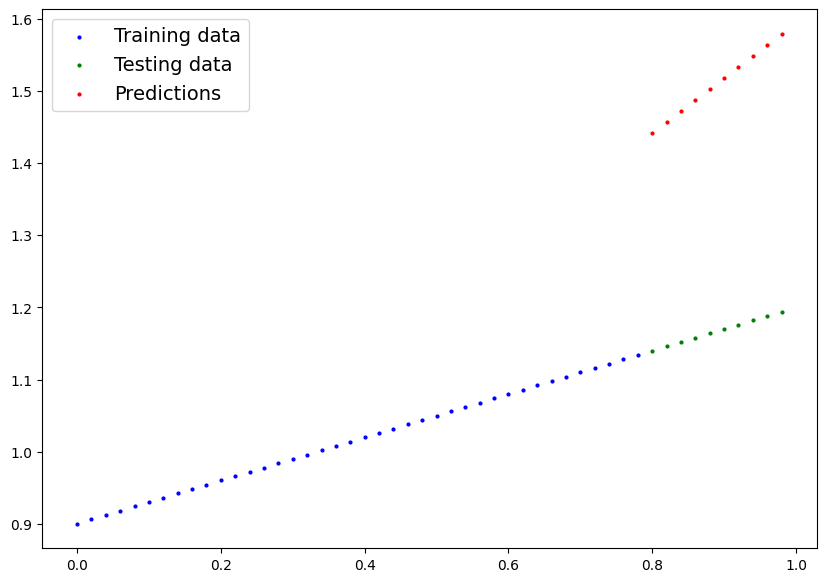

In [10]:
# Plotting the random predictions
plot_prediction(predictions=y_preds)

## Creating a loss function and optimizer

In [11]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

## Creating Training Loop

In [12]:
torch.manual_seed(42)
epochs = 301
epoch_count=[]
train_loss_values=[]
test_loss_values=[]
for epoch in range(epochs):

  ### It's training time
  # 0. Setting up the training mode
  model_0.train()

  # 1. Make the Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  train_loss=loss_fn(y_pred,y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backwards
  train_loss.backward()

  # 5. Optimizer step step step
  optimizer.step()


  ### It's testing time
  # 0. Setting up the testing mode
  model_0.eval()

  # 1. with torch no grad
  with torch.inference_mode():

    # 2. Do the forward pass
    test_pred = model_0(X_test)

    # 3. Calculate the loss
    test_loss = loss_fn(test_pred,y_test)

    # 4. watch it go down down down
    if epoch%20==0:
      epoch_count.append(epoch)
      train_loss_values.append(train_loss)
      test_loss_values.append(test_loss)

      print(f"Epoch: {epoch} | Train Loss: {train_loss} | Test Loss: {test_loss}")
      print(model_0.state_dict())

Epoch: 0 | Train Loss: 0.12616769969463348 | Test Loss: 0.33422544598579407
OrderedDict([('Linear_layer.weight', tensor([[0.7609]])), ('Linear_layer.bias', tensor([0.8240]))])
Epoch: 20 | Train Loss: 0.08189655840396881 | Test Loss: 0.21857480704784393
OrderedDict([('Linear_layer.weight', tensor([[0.7012]])), ('Linear_layer.bias', tensor([0.7615]))])
Epoch: 40 | Train Loss: 0.07218800485134125 | Test Loss: 0.17499032616615295
OrderedDict([('Linear_layer.weight', tensor([[0.6590]])), ('Linear_layer.bias', tensor([0.7555]))])
Epoch: 60 | Train Loss: 0.06520797312259674 | Test Loss: 0.15295077860355377
OrderedDict([('Linear_layer.weight', tensor([[0.6230]])), ('Linear_layer.bias', tensor([0.7655]))])
Epoch: 80 | Train Loss: 0.05831370875239372 | Test Loss: 0.1357191950082779
OrderedDict([('Linear_layer.weight', tensor([[0.5884]])), ('Linear_layer.bias', tensor([0.7790]))])
Epoch: 100 | Train Loss: 0.051440197974443436 | Test Loss: 0.11986131966114044
OrderedDict([('Linear_layer.weight', t

In [13]:
epoch_count,train_loss_values,test_loss_values

([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300],
 [tensor(0.1262, grad_fn=<MeanBackward0>),
  tensor(0.0819, grad_fn=<MeanBackward0>),
  tensor(0.0722, grad_fn=<MeanBackward0>),
  tensor(0.0652, grad_fn=<MeanBackward0>),
  tensor(0.0583, grad_fn=<MeanBackward0>),
  tensor(0.0514, grad_fn=<MeanBackward0>),
  tensor(0.0446, grad_fn=<MeanBackward0>),
  tensor(0.0377, grad_fn=<MeanBackward0>),
  tensor(0.0308, grad_fn=<MeanBackward0>),
  tensor(0.0240, grad_fn=<MeanBackward0>),
  tensor(0.0171, grad_fn=<MeanBackward0>),
  tensor(0.0102, grad_fn=<MeanBackward0>),
  tensor(0.0034, grad_fn=<MeanBackward0>),
  tensor(0.0070, grad_fn=<MeanBackward0>),
  tensor(0.0070, grad_fn=<MeanBackward0>),
  tensor(0.0070, grad_fn=<MeanBackward0>)],
 [tensor(0.3342),
  tensor(0.2186),
  tensor(0.1750),
  tensor(0.1530),
  tensor(0.1357),
  tensor(0.1199),
  tensor(0.1033),
  tensor(0.0875),
  tensor(0.0716),
  tensor(0.0551),
  tensor(0.0392),
  tensor(0.0233),
  tensor(0.0068),


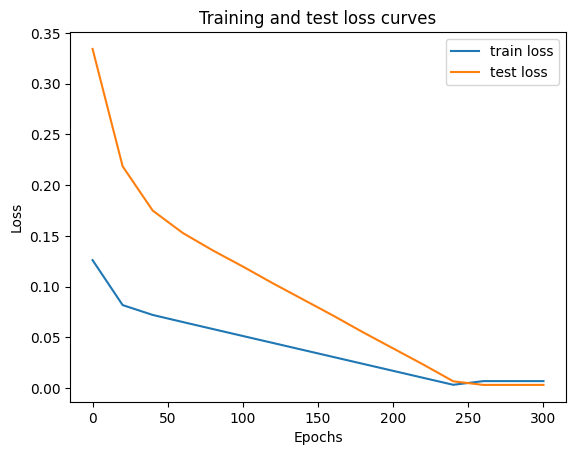

In [14]:
# Plotting the loss curves
plt.plot(epoch_count,np.array(torch.tensor(train_loss_values).numpy()),label='train loss')
plt.plot(epoch_count,test_loss_values,label='test loss')
plt.title('Training and test loss curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

## Making Predictions with Trained Model

In [15]:
with torch.inference_mode():
  y_pred = model_0(X_test)
y_pred

tensor([[1.1365],
        [1.1426],
        [1.1486],
        [1.1547],
        [1.1607],
        [1.1668],
        [1.1728],
        [1.1789],
        [1.1849],
        [1.1910]])

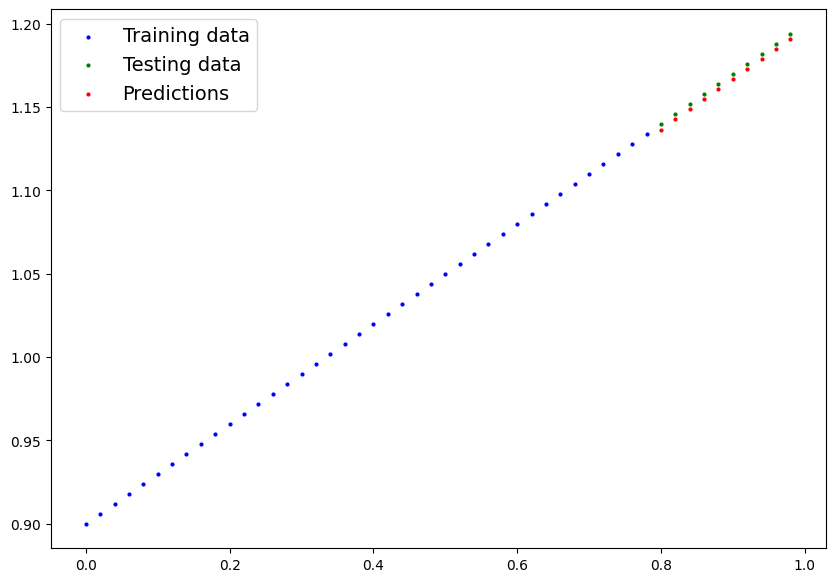

In [16]:
# Plotting predictions
plot_prediction(predictions=y_pred)

## Saving the model

In [17]:
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME = "simple_linear_regression_model.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
print(f"Saving model to; {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

Saving model to; models/simple_linear_regression_model.pth


In [18]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1762 Mar 12 07:29 simple_linear_regression_model.pth


## Loading the pytorch model

In [24]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [20]:
loaded_model_0.state_dict()

OrderedDict([('Linear_layer.weight', tensor([[0.3025]])),
             ('Linear_layer.bias', tensor([0.8945]))])

## Making predictions with loaded model

In [25]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
y_pred == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])